## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier as clf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.cluster import KMeans
import pickle
from sklearn.model_selection import GridSearchCV
!pip install imbalanced_learn 
from imblearn.under_sampling import RandomUnderSampler

Defaulting to user installation because normal site-packages is not writeable


## Importing Data

In [2]:
df = pd.read_csv('Part2 Data.csv')
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


## Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [4]:
df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [6]:
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].isna().value_counts())
    print('')
    print('')

COUGH
False    44453
Name: COUGH, dtype: int64


MUSCLE_ACHES
False    44453
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
False    44453
Name: TIREDNESS, dtype: int64


SORE_THROAT
False    44453
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
False    44453
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
False    44453
Name: STUFFY_NOSE, dtype: int64


FEVER
False    44453
Name: FEVER, dtype: int64


NAUSEA
False    44453
Name: NAUSEA, dtype: int64


VOMITING
False    44453
Name: VOMITING, dtype: int64


DIARRHEA
False    44453
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
False    44453
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
False    44453
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
False    44453
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
False    44453
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
False    44453
Name: ITCHY_NOSE, dtype: int64


ITCHY_EYES
False    44453
Name: ITCHY_EYES, dtype: int64


ITCHY_MOUTH
False    44453
Name: ITC

In [7]:
print(df['TYPE'].unique())

['ALLERGY' 'COLD' 'COVID' 'FLU']


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44448    False
44449    False
44450    False
44451    False
44452    False
Length: 44453, dtype: bool

## Exploratory Analysis

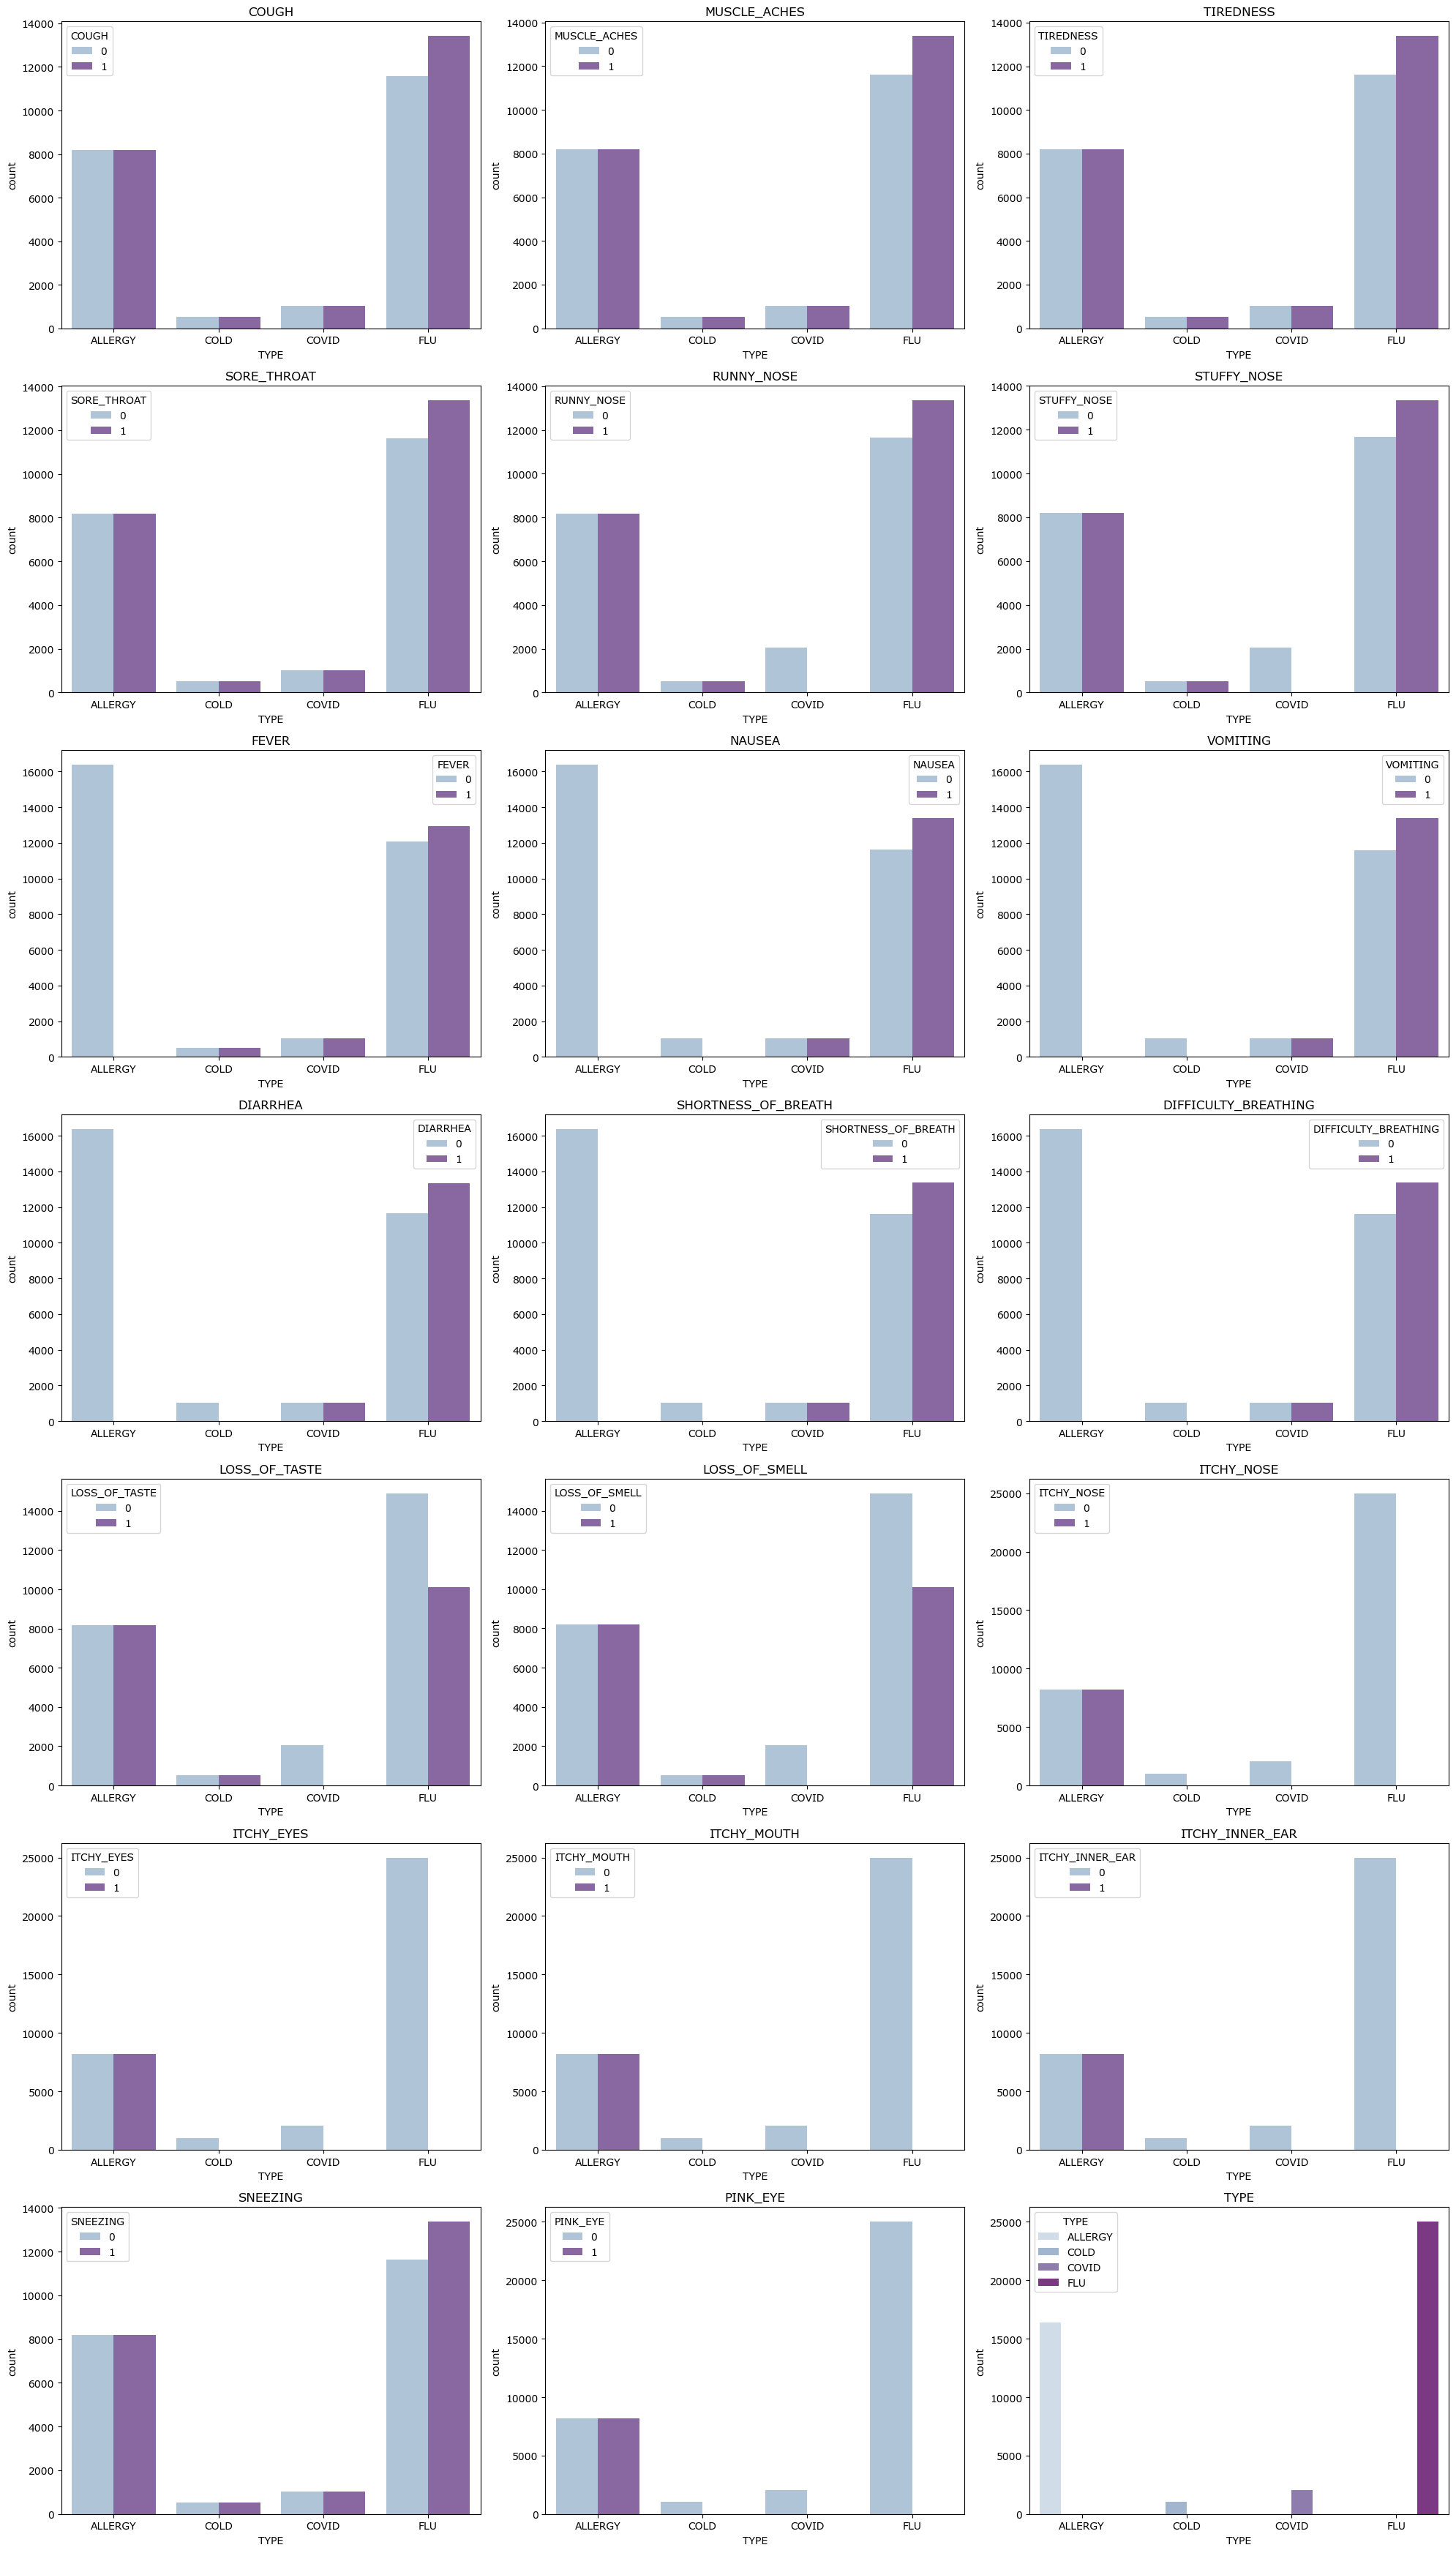

In [9]:
cols = df.columns
num_cols = len(cols)

nrows = np.ceil(num_cols/3).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    # sns.countplot(x=col, data=df, ax=axes[i])
    sns.countplot(x='TYPE', data=df, hue=col, palette='BuPu',ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [10]:
warnings.filterwarnings('ignore')
df.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


<Axes: title={'center': 'Heatmap of the Different Features'}>

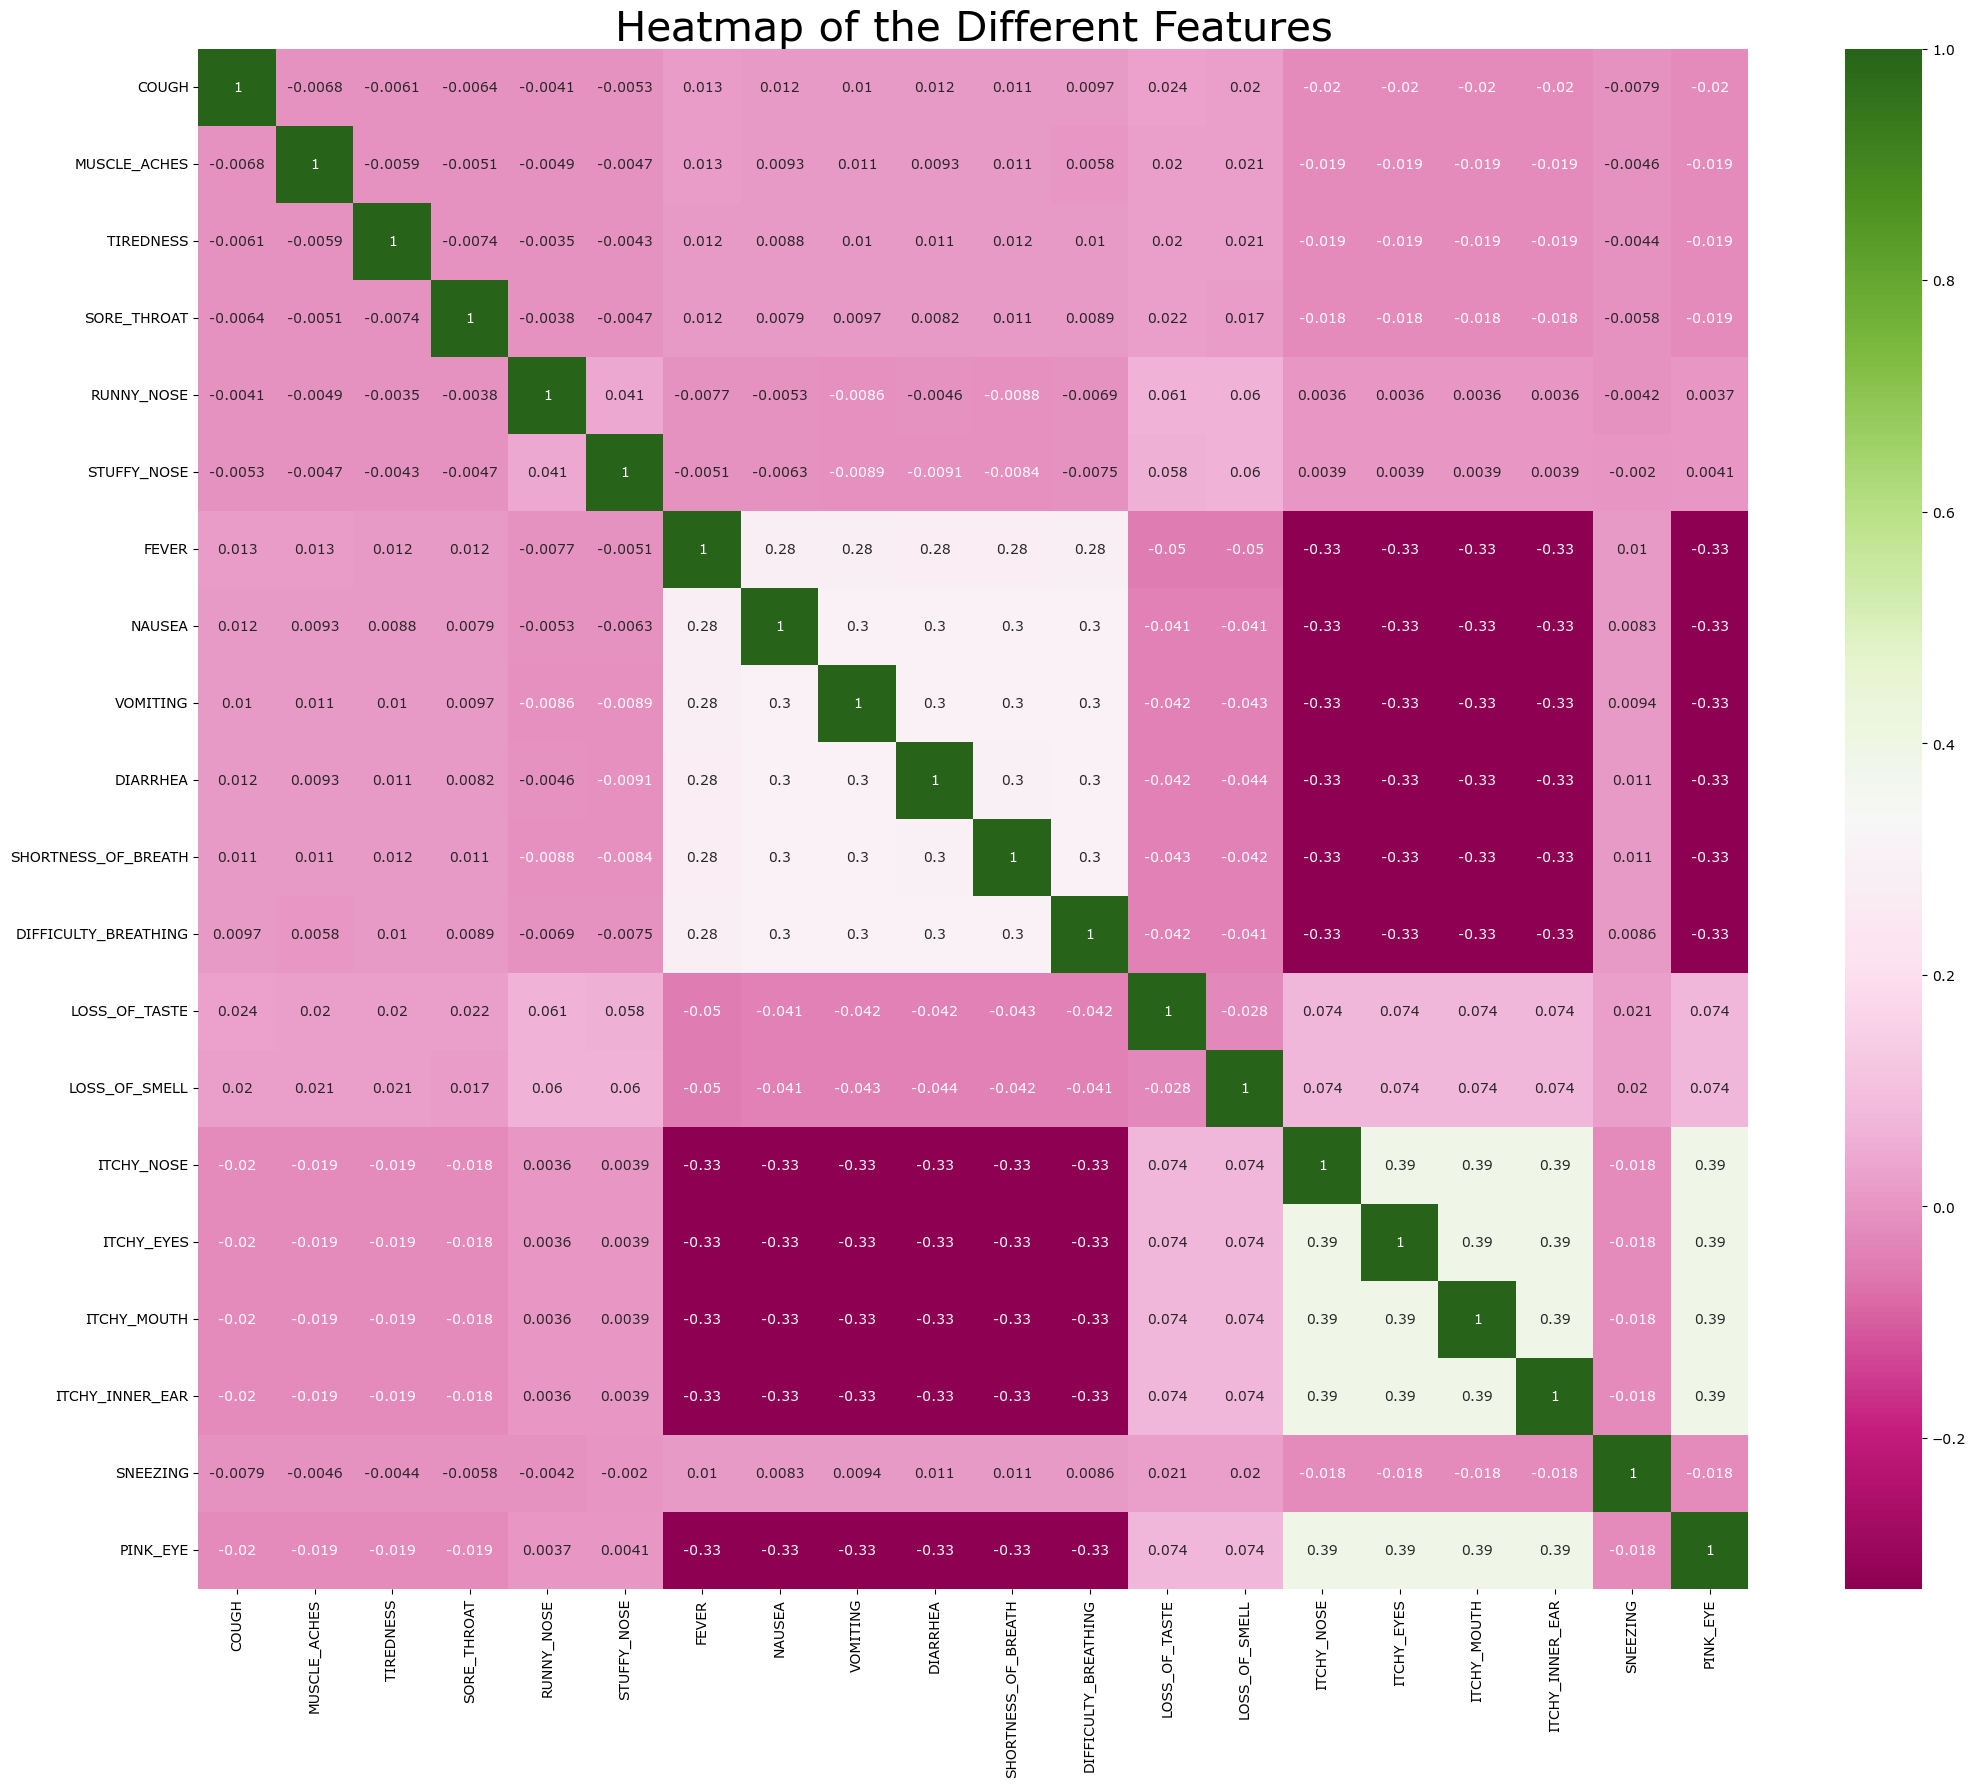

In [11]:
# plot the heatmap
warnings.filterwarnings('ignore')
plt.figure(figsize=(25,20))
plt.title('Heatmap of the Different Features', size=30)
sns.heatmap(df.corr(), annot=True, cmap='PiYG')

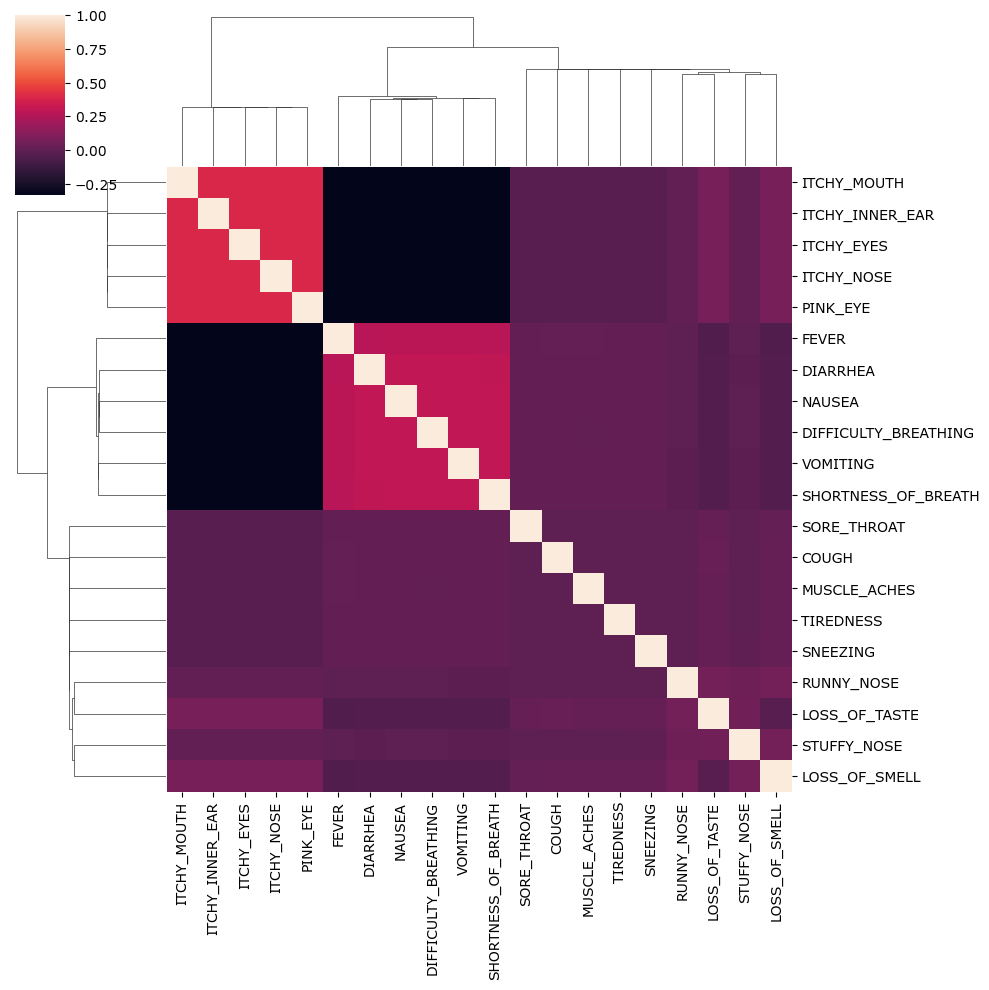

In [12]:
# plot the clustermap
sns.clustermap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=False)

## Train Test

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN before Undersampling

In [15]:
mrange = np.arange(1,100,2)
mrange

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [16]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': mrange,
}

In [17]:
grid_search_knn = GridSearchCV(knn, param_grid,
                                 cv=2, 
                                 verbose=3, 
                                 return_train_score=True,
                                 n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2] END .n_neighbors=1;, score=(train=0.974, test=0.881) total time=   3.6s
[CV 2/2] END .n_neighbors=1;, score=(train=0.975, test=0.882) total time=   3.5s
[CV 1/2] END .n_neighbors=3;, score=(train=0.950, test=0.914) total time=   6.9s
[CV 2/2] END .n_neighbors=3;, score=(train=0.951, test=0.913) total time=   7.0s
[CV 1/2] END .n_neighbors=5;, score=(train=0.946, test=0.921) total time=   4.5s
[CV 2/2] END .n_neighbors=5;, score=(train=0.947, test=0.920) total time=   4.2s
[CV 1/2] END .n_neighbors=7;, score=(train=0.943, test=0.923) total time=   4.6s
[CV 2/2] END .n_neighbors=7;, score=(train=0.944, test=0.922) total time=   4.2s
[CV 1/2] END .n_neighbors=9;, score=(train=0.942, test=0.923) total time=   4.6s
[CV 2/2] END .n_neighbors=9;, score=(train=0.943, test=0.922) total time=   4.2s
[CV 1/2] END n_neighbors=11;, score=(train=0.940, test=0.926) total time=   4.7s
[CV 2/2] END n_neighbors=11;, score=(train=0.94

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             return_train_score=True, verbose=3)

In [18]:
print(f"Best Parameters: {grid_search_knn.best_params_} with best score {grid_search_knn.best_score_}")

Best Parameters: {'n_neighbors': 43} with best score 0.9283992279622575


In [19]:
y_pred_knn_train = grid_search_knn.predict(X_train)
print(accuracy_score(y_train,y_pred_knn_train)*100)
print()
print(classification_report(y_train,y_pred_knn_train))

93.10023459845101

              precision    recall  f1-score   support

     ALLERGY       0.96      1.00      0.98     11403
        COLD       0.78      0.27      0.40       736
       COVID       0.57      0.09      0.15      1458
         FLU       0.92      0.99      0.95     17520

    accuracy                           0.93     31117
   macro avg       0.81      0.59      0.62     31117
weighted avg       0.91      0.93      0.91     31117



In [20]:
y_pred_knn_test = grid_search_knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn_test)*100)
print()
print(classification_report(y_test,y_pred_knn_test))

93.13137372525495

              precision    recall  f1-score   support

     ALLERGY       0.97      0.99      0.98      4978
        COLD       0.76      0.23      0.36       288
       COVID       0.38      0.05      0.09       590
         FLU       0.92      0.99      0.95      7480

    accuracy                           0.93     13336
   macro avg       0.76      0.57      0.59     13336
weighted avg       0.91      0.93      0.91     13336



### Covid and Cold are Undersampled

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y.value_counts()

FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64

<Axes: ylabel='TYPE'>

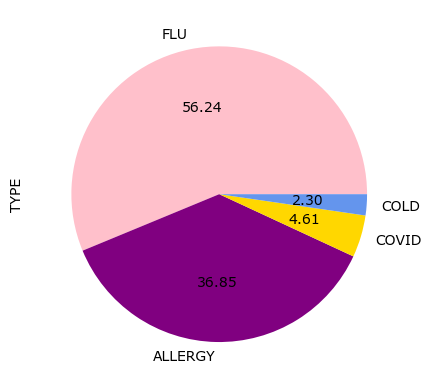

In [22]:
y.value_counts().plot.pie(autopct='%.2f', colors=['pink','purple','gold','cornflowerblue'])

In [23]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={"FLU": 7000,
                                                              "ALLERGY":7000})
X, y = rus.fit_resample(X, y)

<Axes: ylabel='TYPE'>

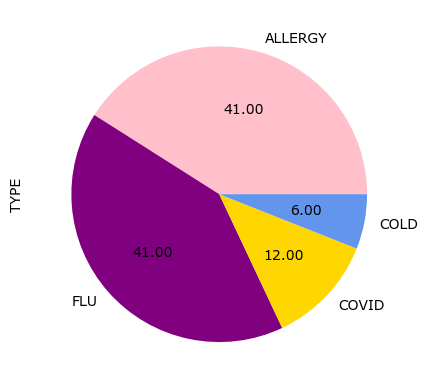

In [24]:
y.value_counts().plot.pie(autopct='%.2f', colors=['pink','purple','gold','cornflowerblue'])

## KNN after Undersampling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
grid_search_knn = GridSearchCV(knn, param_grid,
                                 cv=2, 
                                 verbose=3, 
                                 return_train_score=True,
                                 n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2] END .n_neighbors=1;, score=(train=0.979, test=0.842) total time=   0.6s
[CV 2/2] END .n_neighbors=1;, score=(train=0.983, test=0.835) total time=   0.6s
[CV 1/2] END .n_neighbors=3;, score=(train=0.937, test=0.881) total time=   1.1s
[CV 2/2] END .n_neighbors=3;, score=(train=0.936, test=0.880) total time=   1.1s
[CV 1/2] END .n_neighbors=5;, score=(train=0.929, test=0.899) total time=   0.8s
[CV 2/2] END .n_neighbors=5;, score=(train=0.936, test=0.899) total time=   0.9s
[CV 1/2] END .n_neighbors=7;, score=(train=0.932, test=0.909) total time=   0.7s
[CV 2/2] END .n_neighbors=7;, score=(train=0.934, test=0.908) total time=   0.7s
[CV 1/2] END .n_neighbors=9;, score=(train=0.931, test=0.914) total time=   0.8s
[CV 2/2] END .n_neighbors=9;, score=(train=0.937, test=0.913) total time=   0.8s
[CV 1/2] END n_neighbors=11;, score=(train=0.934, test=0.918) total time=   0.7s
[CV 2/2] END n_neighbors=11;, score=(train=0.93

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             return_train_score=True, verbose=3)

In [27]:
print(f"Best Parameters: {grid_search_knn.best_params_} with best score {grid_search_knn.best_score_}")

Best Parameters: {'n_neighbors': 45} with best score 0.9358995815899582


In [28]:
# Saving the knn model
model1 = knn

# Specify the file path to save the model
file_path = 'model1.pkl'  # Replace 'model.pkl' with your desired file path and name

# Save the model
with open(file_path, 'wb') as file:
    pickle.dump(model1, file)

## Testing Model1

In [30]:
# Reloading the knn model
pickled_model1 = pickle.load(open('model1.pkl', 'rb'))
pickled_model1.fit(X_train, y_train)
pickled_model1.predict(X_test)

y_pred=pickled_model1.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9037485357282311


In [31]:
y_pred_knn_train = pickled_model1.predict(X_train)
print(accuracy_score(y_train,y_pred_knn_train)*100)
print()
print(classification_report(y_train,y_pred_knn_train))

93.62343096234311

              precision    recall  f1-score   support

     ALLERGY       0.98      0.98      0.98      4909
        COLD       0.74      0.84      0.79       706
       COVID       0.78      0.93      0.85      1418
         FLU       0.98      0.91      0.94      4917

    accuracy                           0.94     11950
   macro avg       0.87      0.92      0.89     11950
weighted avg       0.94      0.94      0.94     11950



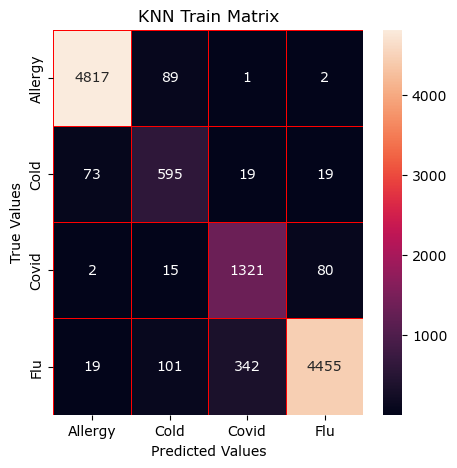

In [32]:
cm=confusion_matrix(y_train, y_pred_knn_train) 
f, ax=plt.subplots(figsize = (5,5))

class_labels=['Allergy', 'Cold', 'Covid', 'Flu']

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax, xticklabels=class_labels, yticklabels=class_labels)
plt.title('KNN Train Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


In [33]:
y_pred_knn_test = pickled_model1.predict(X_test)
print(accuracy_score(y_test,y_pred_knn_test)*100)
print()
print(classification_report(y_test,y_pred_knn_test))

90.37485357282311

              precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      2091
        COLD       0.65      0.75      0.70       318
       COVID       0.72      0.85      0.78       630
         FLU       0.95      0.87      0.91      2083

    accuracy                           0.90      5122
   macro avg       0.82      0.86      0.84      5122
weighted avg       0.91      0.90      0.91      5122



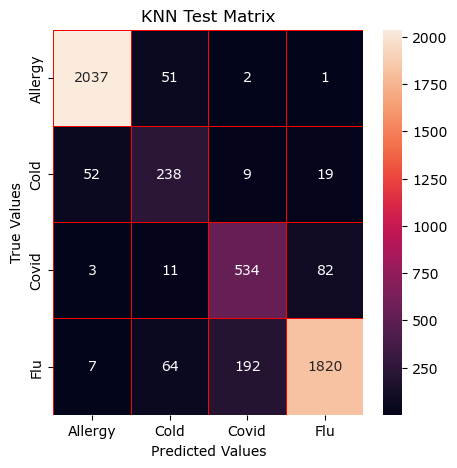

In [34]:
cm= confusion_matrix(y_test, y_pred_knn_test) 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax, xticklabels=class_labels, yticklabels=class_labels)
plt.title('KNN Test Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

## Naive Bayes Algorithm

In [35]:
mrange = np.arange(0.1, 1.1, 0.1)

In [36]:
nb = CategoricalNB()
param_grid = {
    'alpha': mrange
}

In [37]:
grid_search_nb = GridSearchCV(nb, param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True)
grid_search_nb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....alpha=0.1;, score=(train=0.944, test=0.950) total time=   0.0s
[CV 2/5] END .....alpha=0.1;, score=(train=0.945, test=0.948) total time=   0.0s
[CV 3/5] END .....alpha=0.1;, score=(train=0.944, test=0.950) total time=   0.0s
[CV 4/5] END .....alpha=0.1;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 5/5] END .....alpha=0.1;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 1/5] END .....alpha=0.2;, score=(train=0.944, test=0.950) total time=   0.0s
[CV 2/5] END .....alpha=0.2;, score=(train=0.945, test=0.948) total time=   0.0s
[CV 3/5] END .....alpha=0.2;, score=(train=0.944, test=0.950) total time=   0.0s
[CV 4/5] END .....alpha=0.2;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 5/5] END .....alpha=0.2;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 1/5] END alpha=0.30000000000000004;, score=(train=0.944, test=0.950) total time=   0.0s
[CV 2/5] END alpha=0.3000000000000000

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, verbose=3)

In [38]:
print(f"Best Parameters: {grid_search_nb.best_params_} with best score {grid_search_nb.best_score_}")

Best Parameters: {'alpha': 0.1} with best score 0.9448535564853557


In [39]:
# Saving the CategoricalNB model
model2 = grid_search_nb

# Specify the file path to save the model
file_path = 'model2.pkl'  # Replace 'model.pkl' with your desired file path and name

# Save the model
with open(file_path, 'wb') as file:
    pickle.dump(model2, file)

### Testing Model2

In [40]:
# Reloading the nb model
pickled_model2 = pickle.load(open('model2.pkl', 'rb'))
pickled_model2.predict(X_test)

array(['ALLERGY', 'ALLERGY', 'ALLERGY', ..., 'FLU', 'ALLERGY', 'ALLERGY'],
      dtype='<U7')

In [41]:
y_pred_nb_train = pickled_model2.predict(X_train)
print(accuracy_score(y_train,y_pred_nb_train)*100)
print()
print(classification_report(y_train,y_pred_nb_train))

94.5439330543933

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4909
        COLD       0.71      0.99      0.83       706
       COVID       0.79      0.98      0.87      1418
         FLU       1.00      0.90      0.95      4917

    accuracy                           0.95     11950
   macro avg       0.88      0.96      0.91     11950
weighted avg       0.96      0.95      0.95     11950



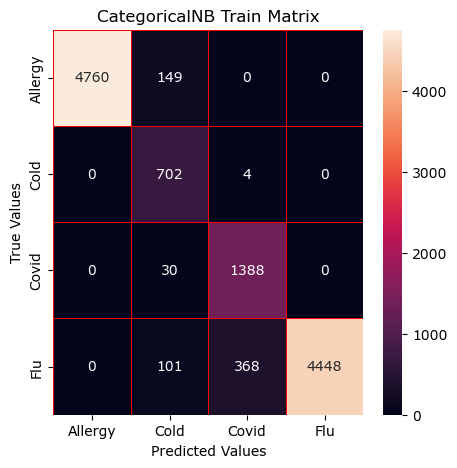

In [42]:
cm= confusion_matrix(y_train, y_pred_nb_train) 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax, xticklabels=class_labels, yticklabels=class_labels)
plt.title('CategoricalNB Train Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [43]:
y_pred_nb_test = pickled_model2.predict(X_test)
print(accuracy_score(y_test,y_pred_nb_test)*100)
print()
print(classification_report(y_test,y_pred_nb_test))

94.49433814916048

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.71      0.98      0.83       318
       COVID       0.79      0.96      0.87       630
         FLU       1.00      0.91      0.95      2083

    accuracy                           0.94      5122
   macro avg       0.88      0.96      0.91      5122
weighted avg       0.96      0.94      0.95      5122



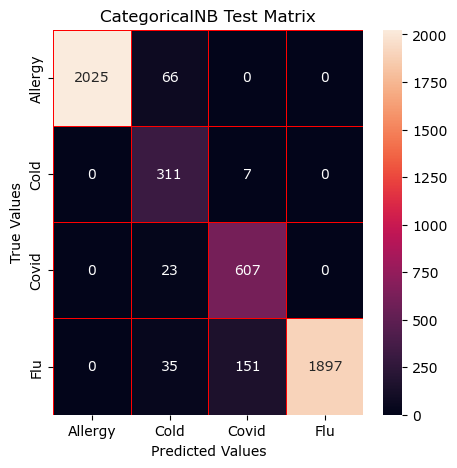

In [44]:
cm= confusion_matrix(y_test, y_pred_nb_test) 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax, xticklabels=class_labels, yticklabels=class_labels)
plt.title('CategoricalNB Test Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

## Compare Models

In [45]:
model_validation_grid = {}
for clf in (grid_search_knn, grid_search_nb):
            model_validation_grid[clf.estimator.__class__.__name__] =  clf.best_score_


In [46]:
model_validation = dict(sorted(model_validation_grid.items(), key=lambda x: x[1], reverse=True))
model_validation

{'CategoricalNB': 0.9448535564853557,
 'KNeighborsClassifier': 0.9358995815899582}

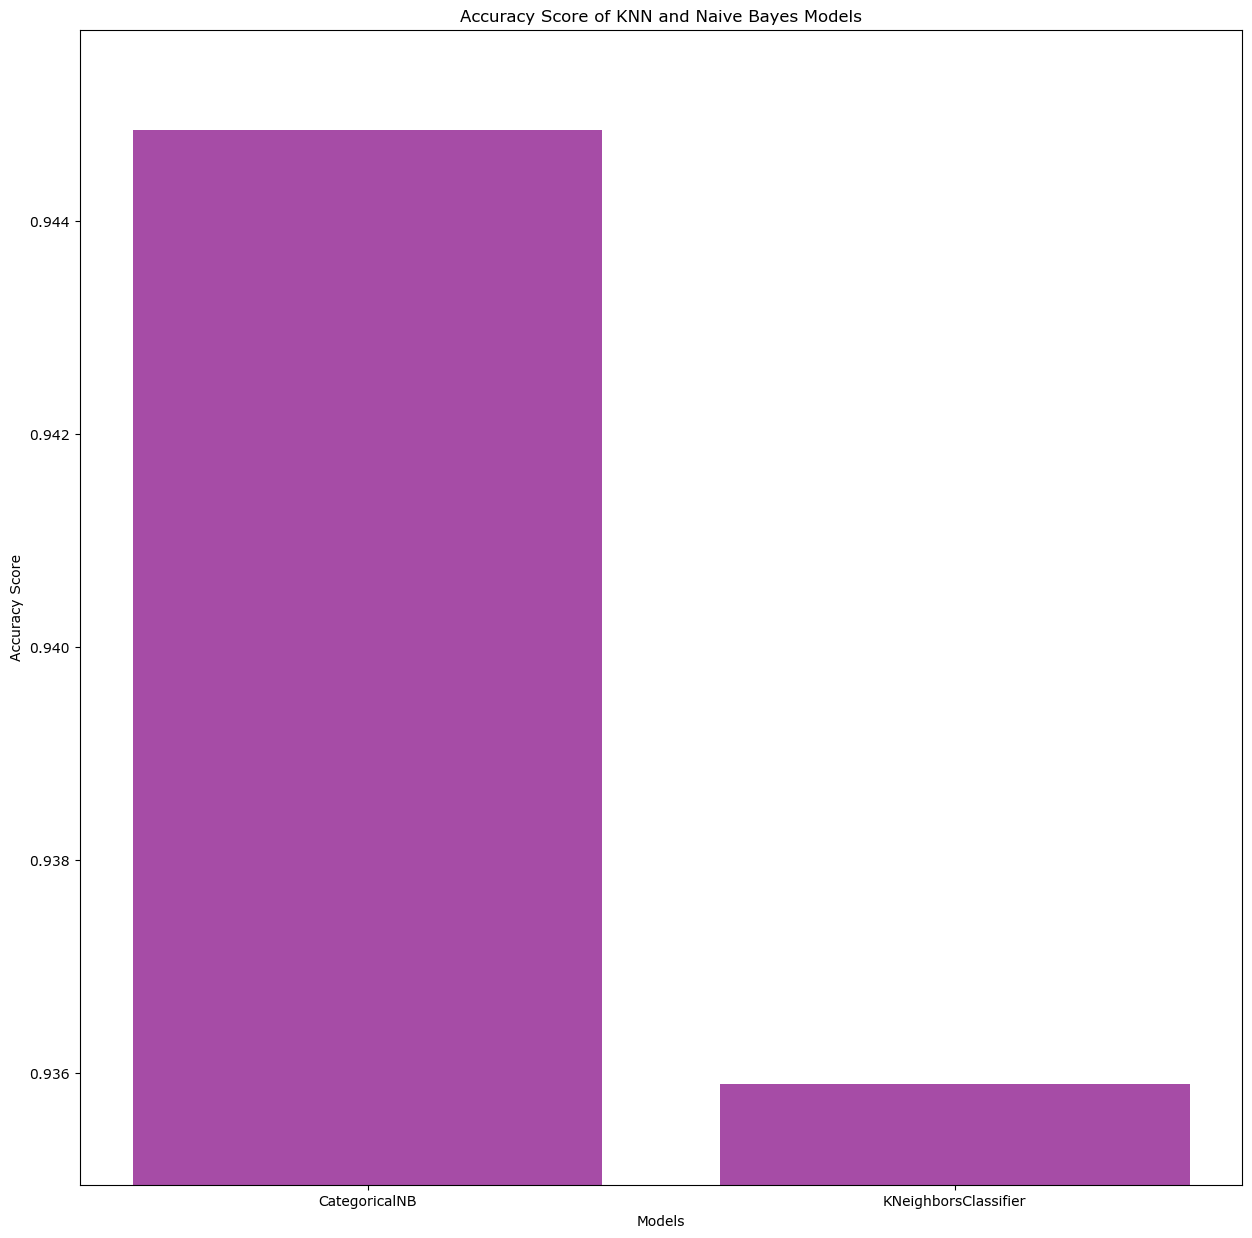

In [47]:
models = np.array(list(model_validation.keys()))
model_validation = np.array(list(model_validation.values()))
plt.figure(figsize = (15,15))
plt.bar(models, model_validation, color='purple', alpha=0.7)

plt.title("Accuracy Score of KNN and Naive Bayes Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

plt.ylim(bottom=min(model_validation) - ((.1/100) * max(model_validation)) , top=max(model_validation) + ((.1/100) * max(model_validation)) )
plt.show()